# 03_Preprocessing_And_Modeling
<hr>


### Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

<hr>

### Read Dataset

In [2]:
df = pd.read_excel('dataset/vgsales_modelling.xlsx')

In [3]:
print (df.dtypes)

name                              object
publisher                         object
developer                         object
vgchartz_score                   float64
critic_score                     float64
user_score                       float64
total_sales                      float64
na_sales                         float64
pal_sales                        float64
jp_sales                         float64
other_sales                      float64
release_date              datetime64[ns]
last_update               datetime64[ns]
release_month                      int64
release_year                       int64
release_day_of_week                int64
release_day                        int64
platform_NS                        int64
genre_Action                       int64
genre_Action-Adventure             int64
genre_Adventure                    int64
genre_Fighting                     int64
genre_MMO                          int64
genre_Music                        int64
genre_Party     

In [4]:
df.date = pd.to_datetime(df.release_date)
df['release_month']=df['release_date'].apply(lambda x: x.to_pydatetime().month)
df['release_year']=df['release_date'].apply(lambda x: x.to_pydatetime().year)
df['release_day_of_week']=df['release_date'].apply(lambda x: x.to_pydatetime().weekday())
df['release_day']=df['release_date'].apply(lambda x: x.to_pydatetime().day)

/Users/raychia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [5]:
df = df.copy()
df = pd.concat([df, pd.get_dummies(df['release_month'])], axis=1);

In [6]:
df.rename(columns={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',  5: 'May',  6: 'Jun',  7: 'Jul',  8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec' }, inplace=True)

In [7]:
df = df.drop(['publisher', 'developer', 'last_update', 'release_date', 'release_month', 'na_sales',
              'pal_sales','jp_sales','other_sales'], axis=1)

In [8]:
print (df.dtypes == object)

name                       True
vgchartz_score            False
critic_score              False
user_score                False
total_sales               False
release_year              False
release_day_of_week       False
release_day               False
platform_NS               False
genre_Action              False
genre_Action-Adventure    False
genre_Adventure           False
genre_Fighting            False
genre_MMO                 False
genre_Music               False
genre_Party               False
genre_Platform            False
genre_Puzzle              False
genre_Racing              False
genre_Role Playing        False
genre_Sandbox             False
genre_Shooter             False
genre_Simulation          False
genre_Sports              False
genre_Strategy            False
platform_XBOX             False
platform_PLAYSTATION      False
platform_OTHER            False
Jan                       False
Feb                       False
Mar                       False
Apr     

In [9]:
df.shape

(15775, 40)

In [10]:
df.head()

,name,vgchartz_score,critic_score,user_score,total_sales,release_year,release_day_of_week,release_day,platform_NS,genre_Action,...,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,Mario Party: Star Rush,0.0,6.2,0.0,870000.0,2016,4,4,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Knowledge is Power,0.0,0.0,0.0,610000.0,2017,1,24,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Animal Crossing: Amiibo Festival,0.0,4.8,0.0,490000.0,2015,4,13,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Momotaro Dentetsu 2017: Tachiagare Nippon!!,0.0,0.0,0.0,400000.0,2016,3,22,0,0,...,0,0,0,0,0,0,0,0,0,1
4,WipeOut 3 The Game,0.0,0.0,0.0,400000.0,2012,1,25,1,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
df['total_sales'].describe()

count    1.577500e+04
mean     4.044951e+05
std      8.801711e+05
min      1.000000e+04
25%      5.000000e+04
50%      1.500000e+05
75%      4.100000e+05
max      2.033000e+07
Name: total_sales, dtype: float64

### Baseline Model

In [12]:
df['total_sales'].mean()

404495.08716323297

Conclusion:

This is the baseline which I can try and beat with my other models. This result means that if i just used the average to predict my RMSE score would be just under $404,000.

### Setting predictor and target variables

In [13]:
features = [col for col in df._get_numeric_data().columns if col != 'total_sales']

X = df[features]
y = df['total_sales']

### Train / Test split 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [15]:
print('Training Features Shape:', X_train.shape)
print('Testing Features Shape:', y_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (11831, 38)
Testing Features Shape: (11831,)
Training Labels Shape: (3944, 38)
Testing Labels Shape: (3944,)


### Prepocessing

In [16]:
ss = StandardScaler(with_mean=False)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Modelling


#### Instantiate the models

In [17]:
lr = LinearRegression()

In [18]:
lasso = LassoCV(n_alphas=200)

In [19]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [20]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

### Cross Validation

In [21]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

-4.115614975414422e+20

In [22]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()

0.14184021554587137

In [23]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_scores.mean()

0.14194628772338308

In [34]:
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_scores.mean()

0.2674945775557045

Random Forest model did the best with the score of 0.2674945775557045

### Fit to Model

In [35]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
rf.score(X_train, y_train)

0.8829836108749283

In [37]:
rf.score(X_test, y_test)

0.40188803495171393

### Interpreting the score

In [38]:
pred = rf.predict(X_test)

In [39]:
r2_score(y_test, pred)

0.401888034951714

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5
print("The root mean squared error of the model is " + str(rmse))

The root mean squared error of the model is 652131.5511774273


With a RMSE score of 650,000, what this means is that our model's prediction is on average off by $650,000 in terms of predicting the total sales volume's price.

### Conclusion & Findings

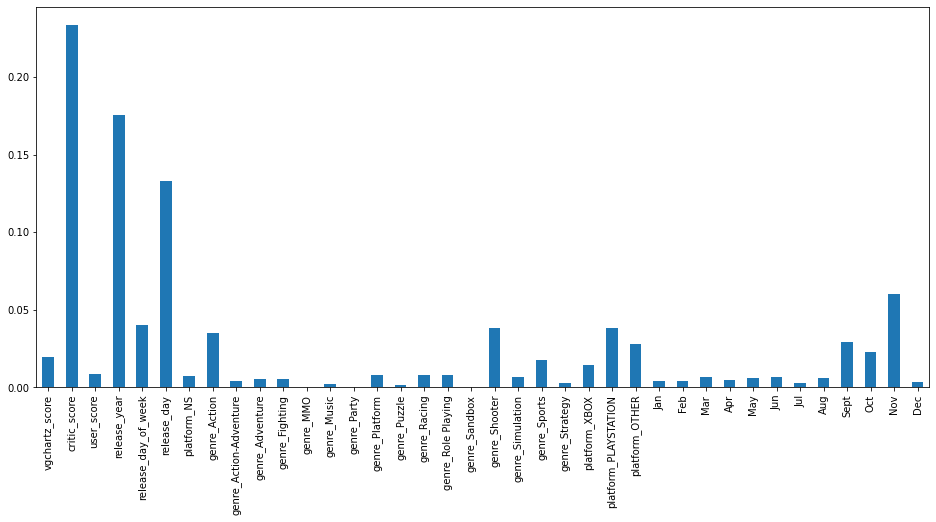

In [41]:
pd.Series(rf.feature_importances_, index=features).plot.bar(figsize=(16, 7))

In [42]:
coef_df = pd.DataFrame([rf.feature_importances_, X.columns], index = ['Coefficients', 'Features']).T
coef_df = coef_df.set_index('Features')
coef_df['Coefficients'] = np.abs(coef_df['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients',ascending=False)
coef_df.head(10)

,Coefficients
Features,
critic_score,0.233443
release_year,0.175787
release_day,0.133212
Nov,0.0604086
release_day_of_week,0.0401135
platform_PLAYSTATION,0.0385195
genre_Shooter,0.038215
genre_Action,0.0349438
Sept,0.0290531


Text(0.5, 0, 'Strength of Predictor')

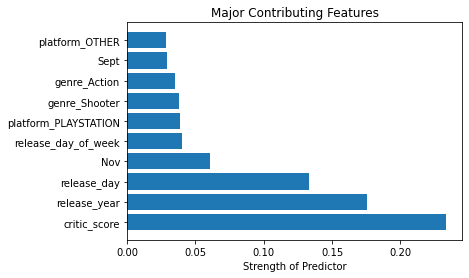

In [43]:
plt.barh(y=coef_df.index[:10], width=coef_df['Coefficients'][0:10]);
plt.title('Major Contributing Features')
plt.xlabel('Strength of Predictor')

## Conclusion

The important features that affect overall total sales are critic_score, release month of November followed by platform to be Playstation.

Through this model, we are able to predict the total sales with with a RMSE score of 650,000, what this means is that our model's prediction is on average off by $650,000. Given the better performance of the model, it is clear that we achieved the objective of our project succesfully.

The ultimate outcome will be, with the details of the total sales prediction for the sales volume, I will use the data to convince stakeholders of the company to set aside an amount of budget for any new game development, focus on building games based on the Playstation and also allocating more marketing strategies and ensuring that the critics give a good score for our games. 

## Recommendation

Additional outside research found that video game downloadable contents and microtransactions to drive $4 billion in sales alone. Therefore much consideration should be made to increase content with new updates and additional features in the game. This will greatly increase the sales revenue of the game developed as well.

Consideration for future game development is that we can create a game which players get to play on their main tv game consoles and at the same time have an mobile game app which is linked. So in this way, we are able to capture the upcoming trend of mobile gaming and ride the wave on the potential revenues that possible be explode in the years to come.